# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Load the dataset**

In [30]:
df = pd.read_csv("/content/insurance_prediction.csv")

# **`Exploratory Data Analysis`**

Exploratory Data Analysis(EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [31]:
# Display first five records of data
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [32]:
# Display last five records of data
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [33]:
# Number of rows and columns
df.shape

(1338, 7)

In [34]:
# list the types of columns
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
expenses,float64


In [35]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
# Statistical Summary
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [37]:
df.dtypes[df.dtypes == 'object'].index

Index(['sex', 'smoker', 'region'], dtype='object')

# **Check for missing data**

In [38]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [39]:
df.shape

(1338, 7)

**Drop the Duplicates**

In [40]:
df=df.drop_duplicates()

In [41]:
df.shape

(1337, 7)

As we can clearly see we were having just one duplicate row which has been removed by this function.

# **Univariate Analysis**

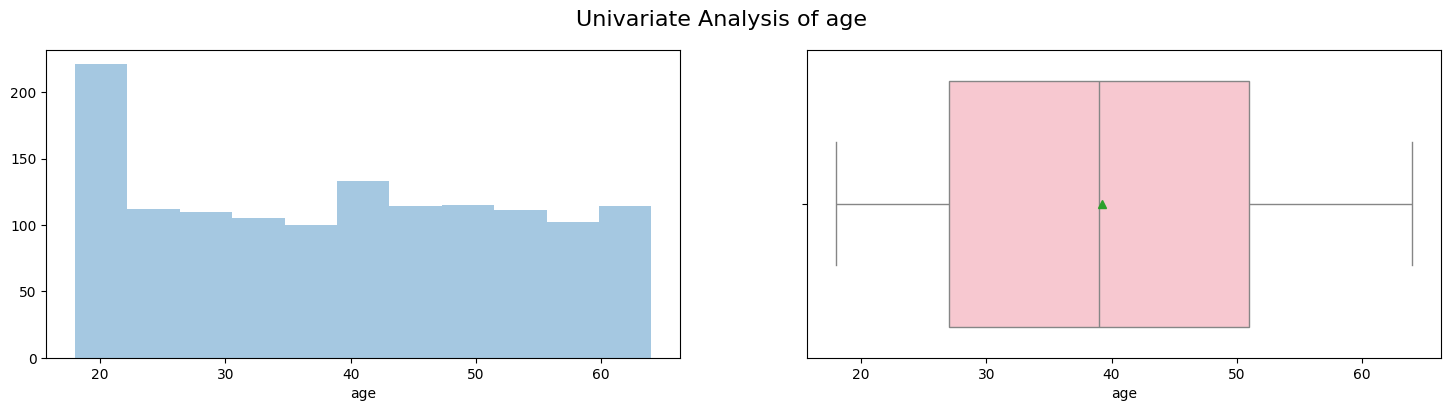

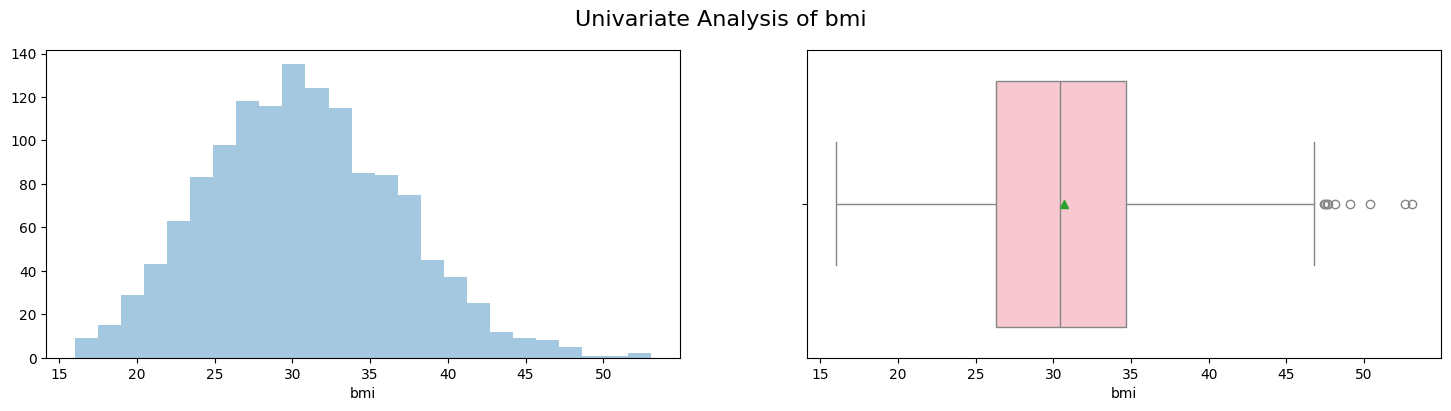

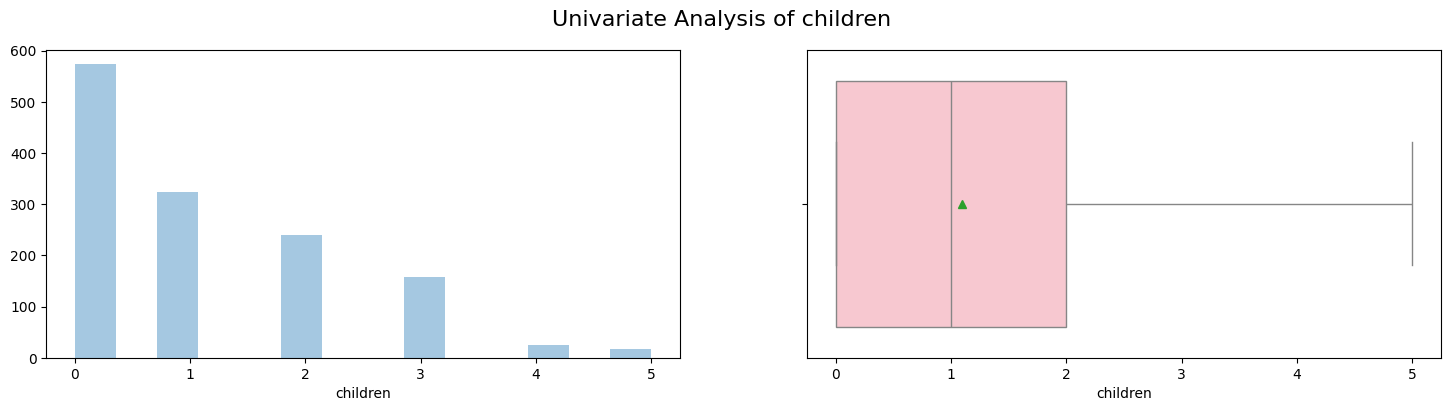

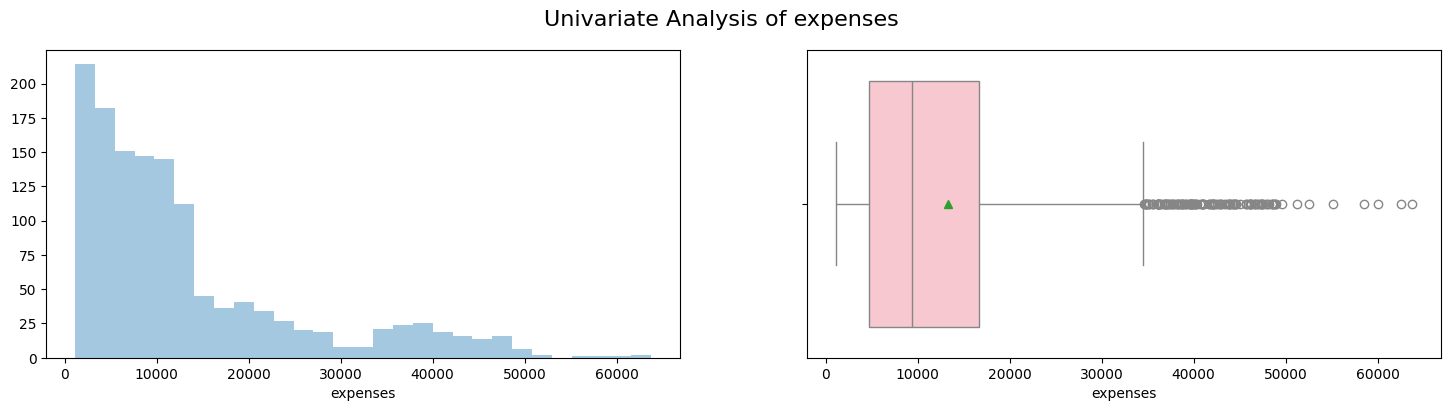

In [42]:
x_axis = ["age", "bmi", "children", "expenses"]
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df[x], ax=axes[0], kde = False)
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

In [43]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

# **Bi variate Analysis**

In [44]:
df['sex'].value_counts()

,count
sex,
male,675
female,662


<Axes: xlabel='sex', ylabel='expenses'>

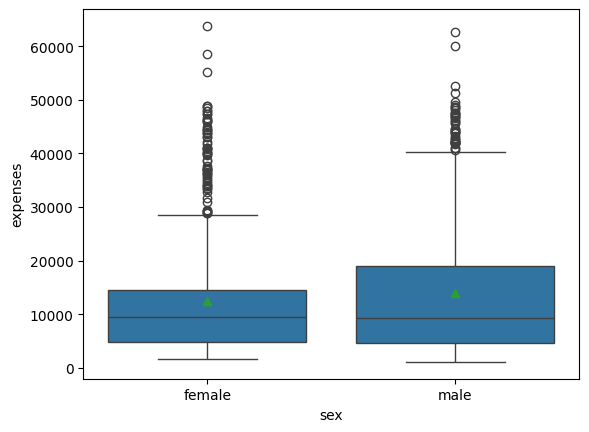

In [45]:
sns.boxplot(x = "sex", y = "expenses", data = df, showmeans = True)

<Axes: xlabel='sex', ylabel='expenses'>

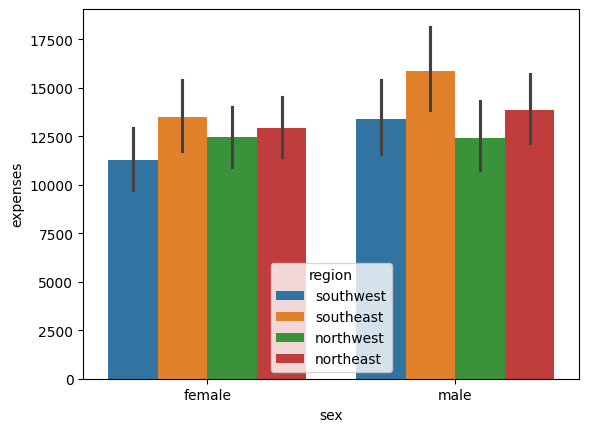

In [46]:
sns.barplot(x = "sex", y = "expenses",hue='region', data = df)

<Axes: xlabel='children', ylabel='expenses'>

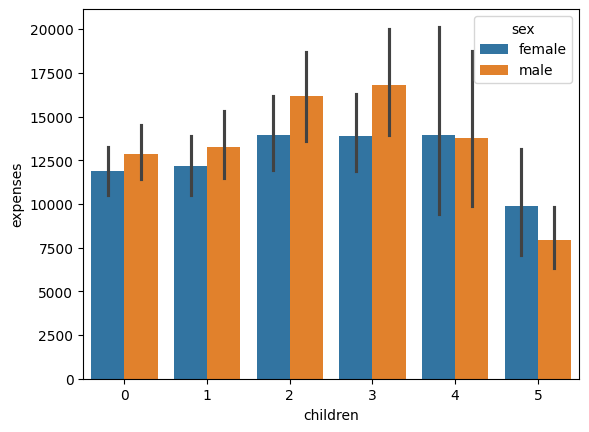

In [19]:
sns.barplot(x = "children", y = "expenses",hue='sex', data = df)

In [47]:
df['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


<Axes: xlabel='smoker', ylabel='expenses'>

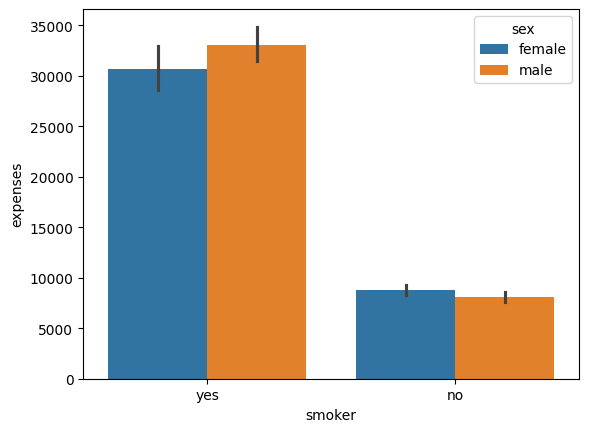

In [48]:
sns.barplot(x='smoker',y='expenses',hue='sex',data=df)

As we can see here expenses for smokers are greater than that of non smokers for both the genders

<Axes: xlabel='smoker', ylabel='expenses'>

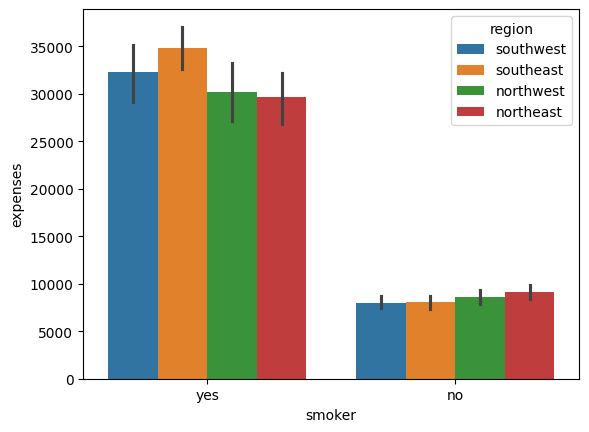

In [49]:
sns.barplot(x='smoker',y='expenses',hue='region',data=df)

<Axes: xlabel='smoker', ylabel='expenses'>

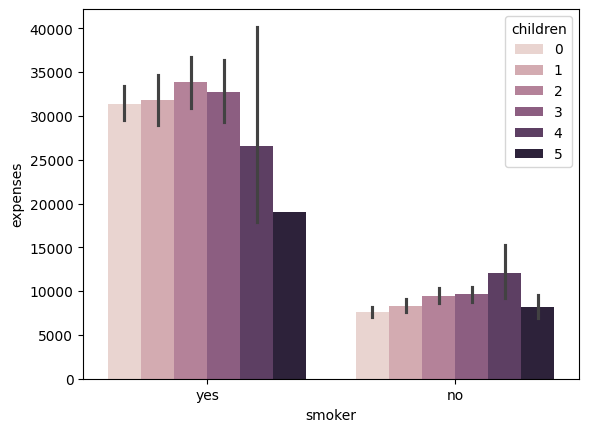

In [50]:
sns.barplot(x='smoker',y='expenses',hue='children',data=df)

In [51]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


<Axes: xlabel='region', ylabel='expenses'>

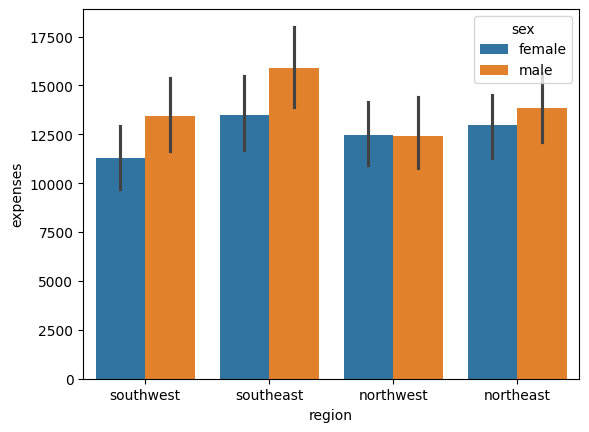

In [52]:
sns.barplot(x='region',y='expenses',hue='sex',data=df)

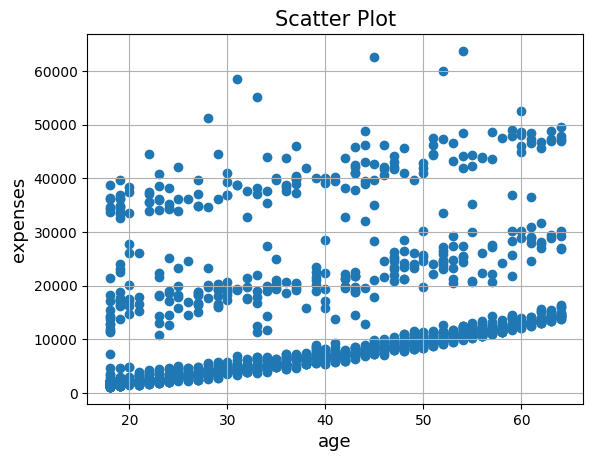

In [53]:
# let's check age versus expenses scatterplot
plt.scatter(df["age"], df["expenses"])
plt.xlabel("age", fontsize = 13)
plt.ylabel("expenses", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

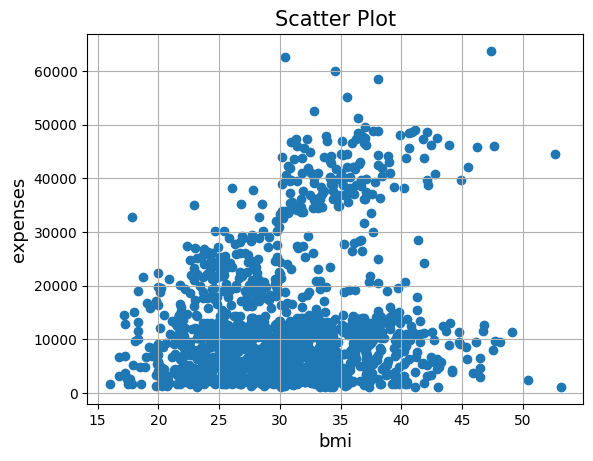

In [54]:
# let's check bmi versus expenses scatterplot
plt.scatter(df["bmi"], df["expenses"])
plt.xlabel("bmi", fontsize = 13)
plt.ylabel("expenses", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

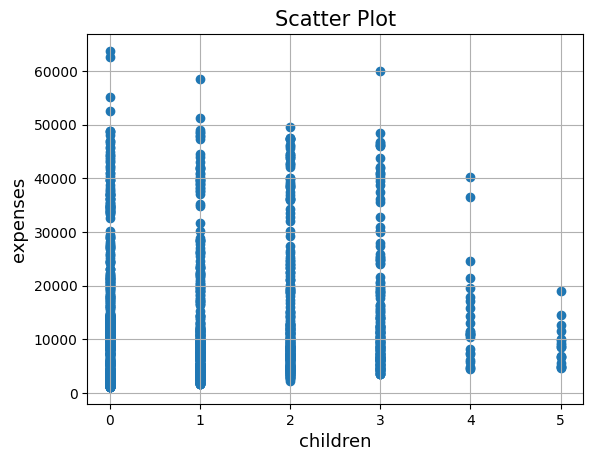

In [55]:
plt.scatter(df["children"], df["expenses"])
plt.xlabel("children", fontsize = 13)
plt.ylabel("expenses", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

# **Correlation using Heatmap**

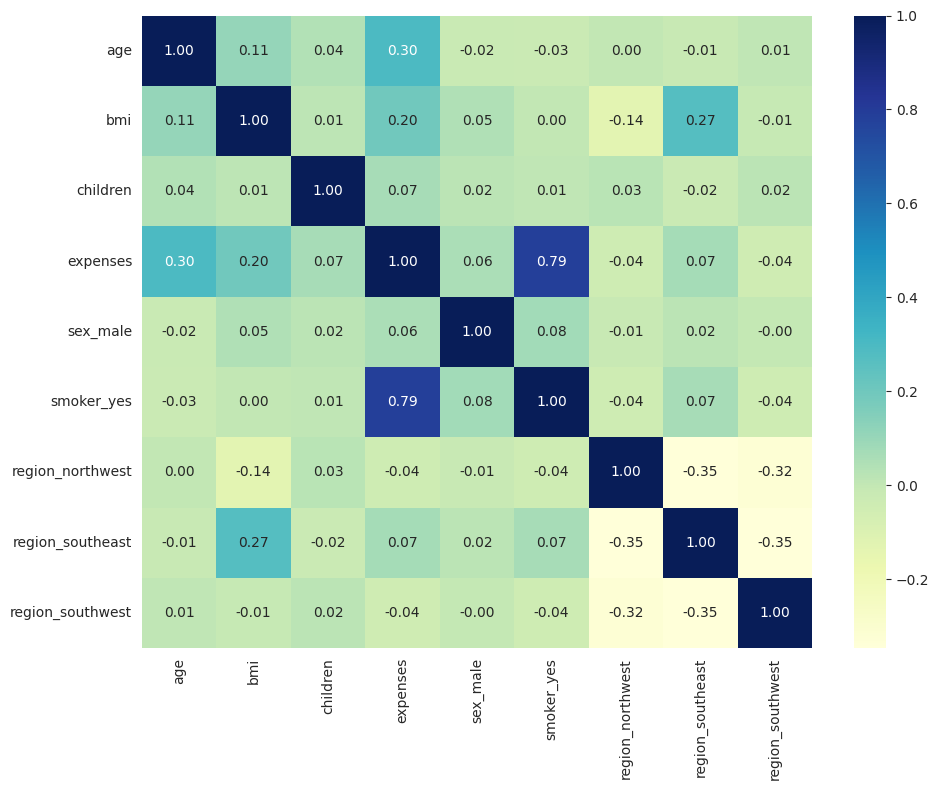

In [56]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(df_encoded.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
    f.tight_layout()

# **Handling Categorical Features**

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [58]:
# Handling categorical feature sex
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [59]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [61]:
# Handling categorical feature smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [62]:
# Handling categorical feature smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [63]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [64]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [65]:
# Handling categorical feature region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [66]:
df['region']=df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


# **Split the data into X & y**

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [69]:
X = df.drop(['expenses'],axis=1)

In [70]:
y = df['expenses']

# **Train Test Split**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Model Building**

# **Model 1: Using Linear Regression**

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

In [75]:
# Evaluating the Algorithm
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred1)
print(score1)

0.8068280291899953


In [76]:
# Evaluating metrics
from sklearn import metrics

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 4182.597271311557
MSE: 35496521.90058501
RMSE: 5957.895761137905


In [78]:
df_1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred1,'Variance':y_test-y_pred1})
df_1.head()

,Actual,Predicted,Variance
900,8688.86,8072.773331,616.086669
1064,5708.87,5592.826031,116.043969
1256,11436.74,14384.173654,-2947.433654
298,38746.36,31735.184973,7011.175027
237,4463.21,9163.154452,-4699.944452


Text(0.5, 0.98, 'Actual vs Predicted')

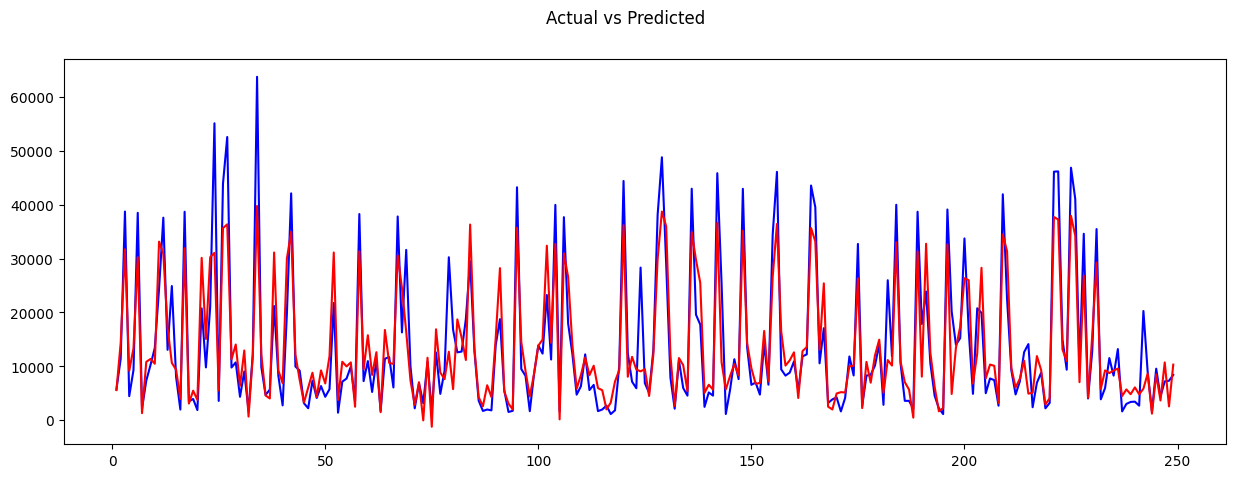

In [79]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred1[1:250],color="red")
fig.suptitle("Actual vs Predicted")

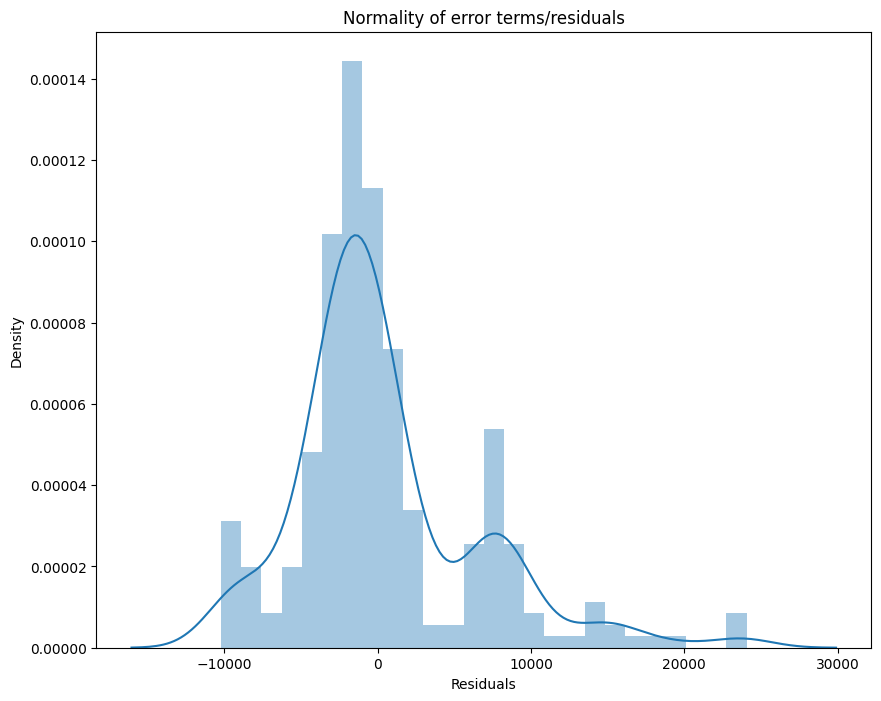

In [80]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(df_1['Variance'],kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

# **Model 2: Using Support Vector Regressor**

In [81]:
from sklearn.svm import SVR

In [82]:
svm = SVR()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

In [83]:
# Evaluating the Algorithm
score2 = r2_score(y_test, y_pred2)
print(score2)

-0.1344469486786597


In [84]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 9249.564867994342
MSE: 208461511.21184444
RMSE: 14438.196258946075


In [85]:
df_2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2,'Variance':y_test-y_pred2})
df_2.head()

,Actual,Predicted,Variance
900,8688.86,9285.046873,-596.186873
1064,5708.87,9160.047578,-3451.177578
1256,11436.74,9304.073967,2132.666033
298,38746.36,9173.348009,29573.011991
237,4463.21,9176.205147,-4712.995147


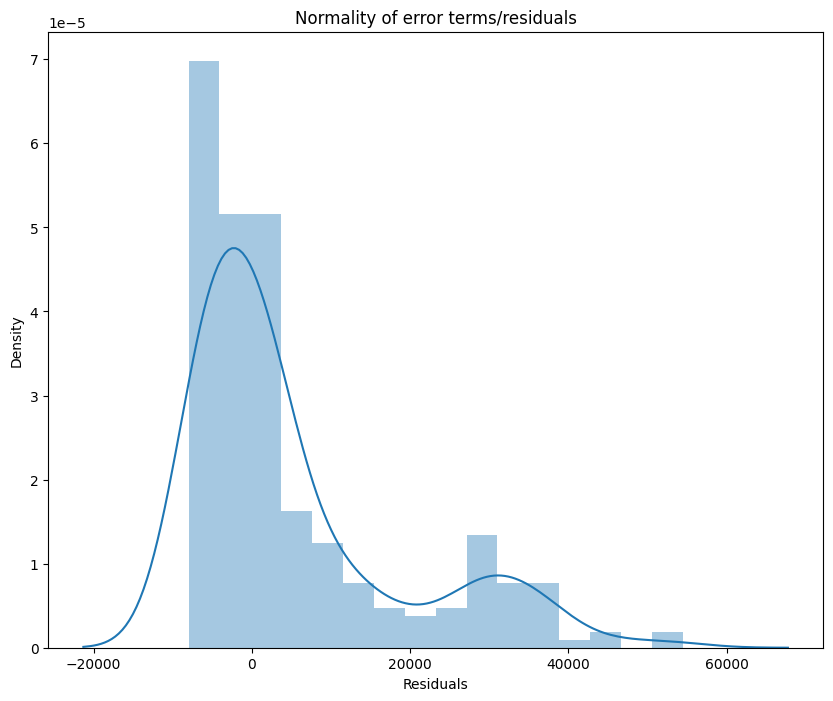

In [86]:
plt.figure(figsize = (10,8))

p = sns.distplot(df_2['Variance'],kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

Text(0.5, 0.98, 'Actual vs Predicted')

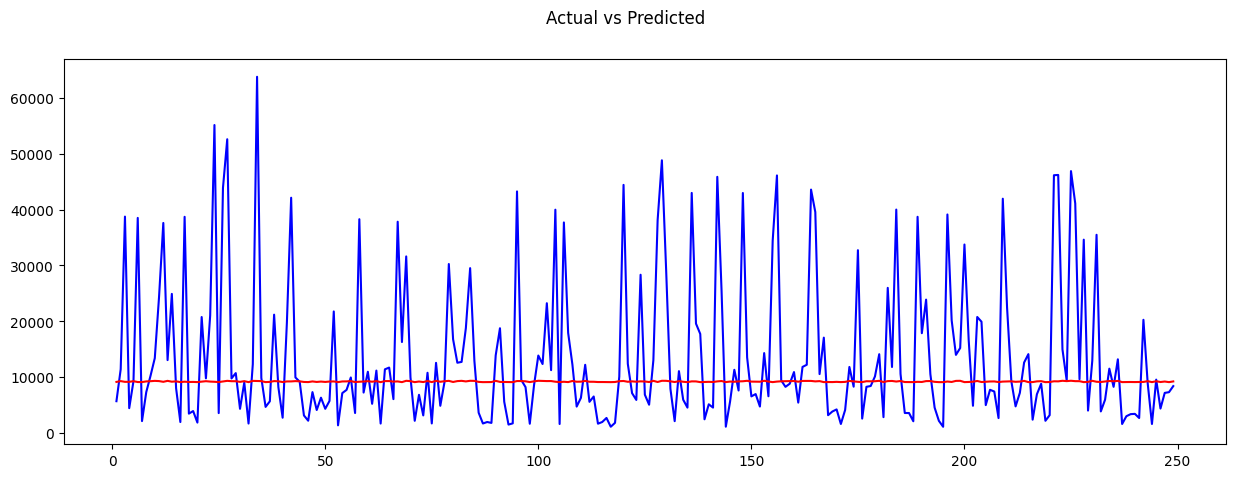

In [87]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred2[1:250],color="red")
fig.suptitle("Actual vs Predicted")

# **Feature Importance**

Checking which feature is important for our target variable

In [88]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [89]:
print(model.feature_importances_)

[0.1291669  0.0102195  0.19308593 0.02465191 0.62056564 0.02231012]


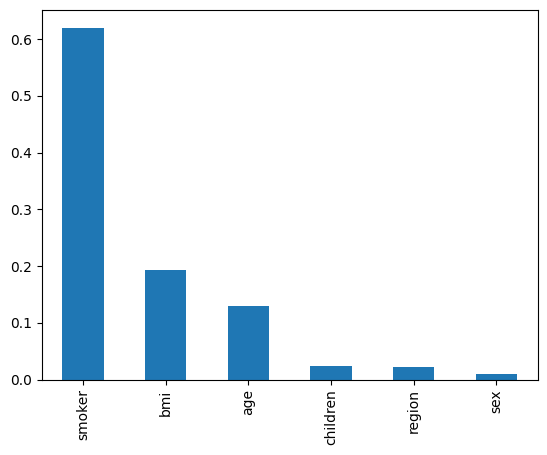

In [90]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()


# Model 3: Using Random Forest Regressor **bold text**

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf = RandomForestRegressor()

In [93]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [96]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [97]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10,
                              cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [98]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [99]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [100]:
rf_random.best_score_

np.float64(-23796707.03511249)

In [101]:
y_pred3 = rf_random.predict(X_test)

In [102]:
# Evaluating the Algorithm
score3 = r2_score(y_test, y_pred3)
print(score3)

0.8771823189856447


In [103]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 2772.8683030970146
MSE: 22568494.205575164
RMSE: 4750.630927105911


In [104]:
df_3 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred3,'Variance':y_test-y_pred3})
df_3.head()

,Actual,Predicted,Variance
900,8688.86,9733.44776,-1044.58776
1064,5708.87,7608.86915,-1899.99915
1256,11436.74,13046.58646,-1609.84646
298,38746.36,37410.66016,1335.69984
237,4463.21,5944.93459,-1481.72459


Text(0.5, 0.98, 'Actual vs Predicted')

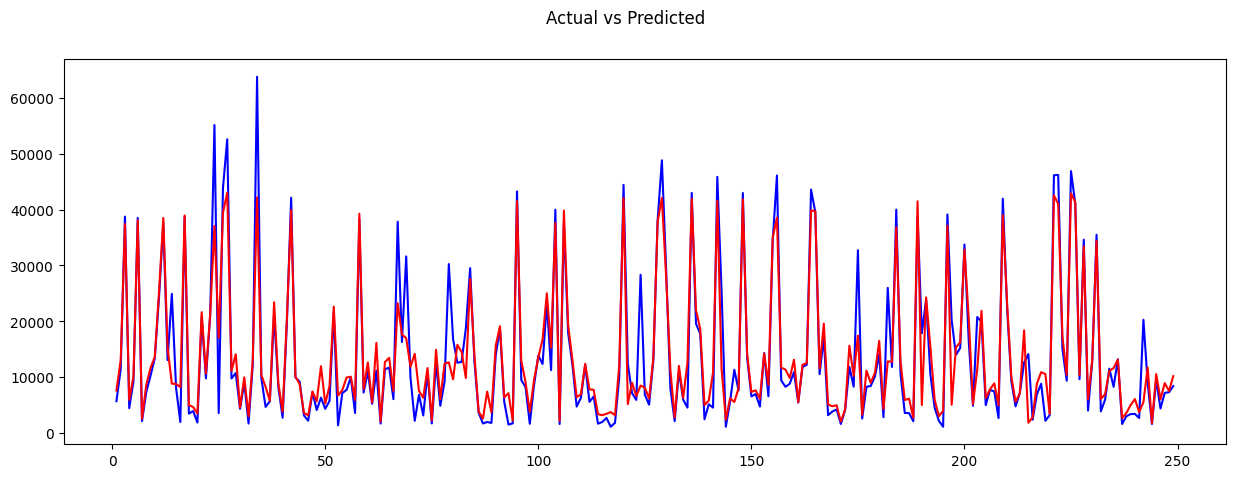

In [105]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred3[1:250],color="red")
fig.suptitle("Actual vs Predicted")

<Axes: xlabel='expenses', ylabel='Density'>

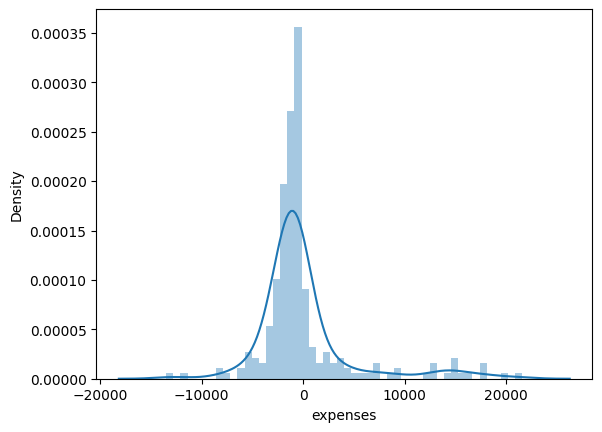

In [106]:
sns.distplot(y_test-y_pred3)

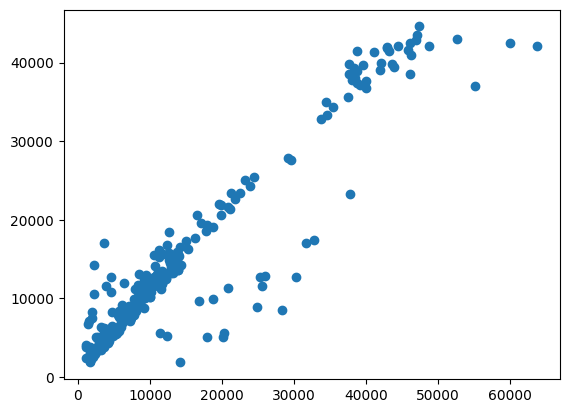

In [107]:
plt.scatter(y_test,y_pred3)

# **Model 4: Using Gradient Boosting**

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

In [109]:
gbr = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

# **Important Parameters**

**`n_estimators:` Number of weak learners to train iteratively.**

**`learning_rate:` It contributes to the weights of weak learners. It uses 1 as default value.**

In [110]:
gbr.fit(X_train,y_train)
y_pred4 = gbr.predict(X_test)

In [111]:
score4 = r2_score(y_test, y_pred4)
print(score4)

0.8886021346716246


# **Hyperparameters Tuning**

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
# Create the param grid
param_grid={'n_estimators':[100,150,200,250],
             'learning_rate':[.001,0.01,.1,0.15,0.05],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}

In [114]:
gbr_model = GridSearchCV(gbr, param_grid, scoring='r2',cv = 5, verbose = 2, n_jobs = 1)

In [115]:
gbr_model.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=1, n_e

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=1.0, max_depth=2,
                                                 n_estimators=3),
             n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.05],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [100, 150, 200, 250],
                         'random_state': [1], 'subsample': [0.5, 0.75, 1]},
             scoring='r2', verbose=2)

In [116]:
gbr_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 150,
 'random_state': 1,
 'subsample': 0.75}

In [117]:
y_pred_gb = gbr_model.predict(X_test)

In [118]:
# Evaluating the Algorithm
score_gb = r2_score(y_test, y_pred_gb)
print(score_gb)

0.9010125953324677


In [119]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

MAE: 2515.741060762318
MSE: 18189536.312796935
RMSE: 4264.919262166276


In [120]:
df_4 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_gb,'Variance':y_test-y_pred_gb})
df_4.head()

,Actual,Predicted,Variance
900,8688.86,9842.494413,-1153.634413
1064,5708.87,6880.928801,-1172.058801
1256,11436.74,13283.033430,-1846.293430
298,38746.36,38448.837168,297.522832
237,4463.21,6664.567231,-2201.357231


Text(0.5, 0.98, 'Actual vs Predicted')

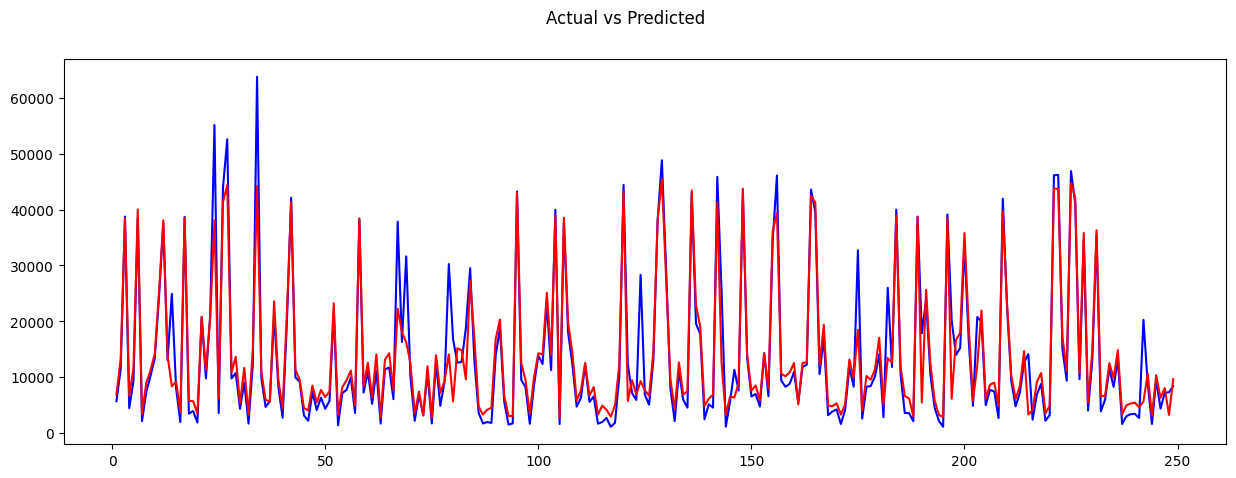

In [121]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred_gb[1:250],color="red")
fig.suptitle("Actual vs Predicted")

<Axes: xlabel='expenses', ylabel='Density'>

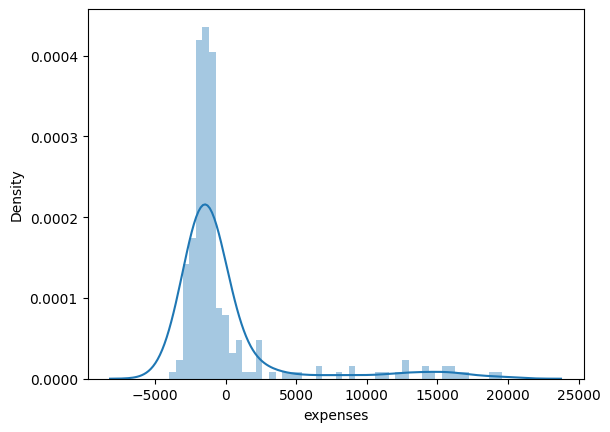

In [122]:
sns.distplot(y_test-y_pred_gb)

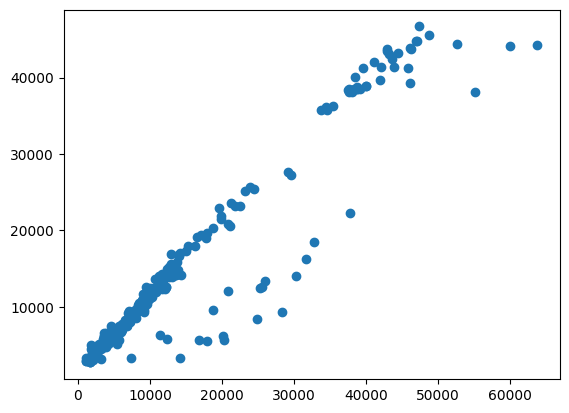

In [123]:
plt.scatter(y_test,y_pred_gb)

# **Comparing predicted values for all models**

In [124]:
df_5 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gb':y_pred_gb})
df_5.head()

,Actual,Lr,svm,rf,gb
900,8688.86,8072.773331,9285.046873,9733.44776,9842.494413
1064,5708.87,5592.826031,9160.047578,7608.86915,6880.928801
1256,11436.74,14384.173654,9304.073967,13046.58646,13283.033430
298,38746.36,31735.184973,9173.348009,37410.66016,38448.837168
237,4463.21,9163.154452,9176.205147,5944.93459,6664.567231


In [125]:
print(score1,score2,score3,score_gb)

0.8068280291899953 -0.1344469486786597 0.8771823189856447 0.9010125953324677


# **Compare Performance Visually**

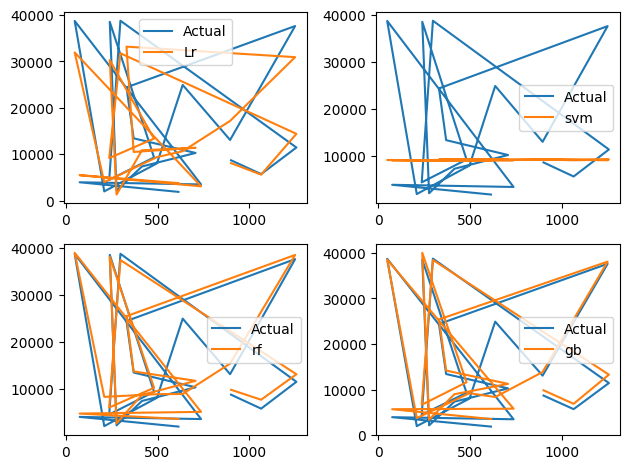

In [126]:
plt.subplot(221)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['Lr'].iloc[0:21],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['svm'].iloc[0:21],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['rf'].iloc[0:21],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['gb'].iloc[0:21],label='gb')

plt.tight_layout()

plt.legend()

In [127]:
# Evaluating the Algorithm
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred_gb)

In [128]:
print(s1,s2,s3,s4)

4182.597271311557 9249.564867994342 2772.8683030970146 2515.741060762318


# **Predict Charges for New Customer**

In [129]:
data = {'age':40,
        'sex':1,
        'bmi':40.30,
        'children':4,
        'smoker':1,
        'region':2}

new_df = pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [130]:
new_pred = rf_random.predict(new_df)
print(new_pred)

[38891.71678]


# **Save Model Using Joblib**

Now we are going to train Random Forest Regressor on entire dataset before deployment

In [131]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

**Now our model is trained on entire dataset**

In [132]:
import joblib

In [133]:
joblib.dump(rf_random,'model_random_forest_regression')

['model_random_forest_regression']

In [134]:
model = joblib.load('model_random_forest_regression')

In [135]:
model.predict(new_df)

array([38657.8458033])

# **Streamlit app for Goggle Colab**

Streamlit Library

In [136]:
!pip install -q streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.1 MB/s eta 0:00:00


Creating Streamlit app

In [145]:
%%writefile app.py

import streamlit as st
import joblib

def main():
     st.markdown("<h1 style='text-align: center; color:white;'>Health Insurance Cost Prediction</h1>",
                 unsafe_allow_html=True)

     st.image('https://emerj.com/wp-content/uploads/2018/10/predictive-analytics'
              '-in-healthcare-current-applications-and-trends-3.jpg')

     model = joblib.load('model_random_forest_regression')

     age = st.slider('Enter Your Age',18,100)

     sex = st.selectbox('Sex',('Male','Female'))
     if(sex=='Male'):
          sex=1
     else:
          sex=0

     bmi = st.number_input("Enter Your BMI Value")

     children = st.selectbox('Enter Number of Children',(0,1,2,3,4))

     smoker = st.selectbox('Smoker',('Yes','No'))
     if(smoker=='Yes'):
          smoker=1
     else:
          smoker=0

     region = st.selectbox('Enter Your Region',('Southwest','Southeast','Northwest','Northeast'))
     if(region=='Southwest'):
          region=1
     elif(region=='Southeast'):
          region=2
     elif(region=='Northwest'):
          region=3
     else:
          region=4

     if st.button('Predict'):
          pred = model.predict([[age, sex, bmi, children, smoker, region]])

          st.balloons()
          st.success('Your Insurance Cost is {}'.format(round(pred[0],2)))


if __name__ == '__main__':
     main()

Writing app.py


Installing Localtunnel to launch our App

In [137]:
!npm install localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 4s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

Run the Streamlit app

In [146]:
!streamlit run app.py &>/content/logs.txt &

In [143]:
!wget -q -O - ipv4.icanhazip.com

34.67.60.85


Expose the running Streamlit App on local tunnel port 8501

In [144]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

your url is: https://quick-geese-chew.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.67.60.85:8501

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
  Stopping...
^C
